<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

In [ ]:
len(tfds.list_builders())

155

In [ ]:
tfds.builder('imdb_reviews').info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [ ]:
imdb_train, ds_info = tfds.load(name="imdb_reviews", split="train", with_info=True, as_supervised=True)
imdb_test = tfds.load(name="imdb_reviews", split="test", as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF50UM0/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF50UM0/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF50UM0/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
print(ds_info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [ ]:
type(imdb_train)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [ ]:
for example, label in imdb_train.take(3):
  print(example.numpy(), '\n', label.numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." 
 0
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development

Tokenization


In [ ]:
tokenizer = tfds.features.text.Tokenizer() #use default tokenizer settings

vocabulary_set = set() #so values are not repeated

for example, label in imdb_train:
  some_tokens = tokenizer.tokenize(example.numpy())
  vocabulary_set.update(some_tokens)

In [ ]:
some_tokens

['First',
 'of',
 'all',
 'Riget',
 'is',
 'wonderful',
 'Good',
 'comedy',
 'and',
 'mystery',
 'thriller',
 'at',
 'the',
 'same',
 'time',
 'Nice',
 'combination',
 'of',
 'strange',
 'dogma',
 'style',
 'of',
 'telling',
 'the',
 'story',
 'together',
 'with',
 'good',
 'music',
 'and',
 'great',
 'actors',
 'But',
 'unfortunately',
 'there',
 's',
 'no',
 'the',
 'end',
 'As',
 'for',
 'me',
 'it',
 's',
 'unacceptable',
 'I',
 'was',
 'thinking',
 'how',
 'it',
 'will',
 'be',
 'possible',
 'to',
 'continue',
 'the',
 'story',
 'without',
 'Helmer',
 'and',
 'Drusse',
 'and',
 'I',
 'have',
 'some',
 'idea',
 'I',
 'think',
 'Lars',
 'should',
 'make',
 'RIGET',
 'III',
 'a',
 'little',
 'bit',
 'different',
 'I',
 'm',
 'sure',
 'that',
 '3rd',
 'part',
 'without',
 'Helmer',
 'wouldn',
 't',
 'be',
 'the',
 'same',
 'So',
 'here',
 's',
 'my',
 'suggestion',
 'Mayble',
 'little',
 'bit',
 'stupid',
 'maybe',
 'not',
 'I',
 'know',
 'that',
 'Lars',
 'likes',
 'to',
 'experiment

In [ ]:
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
MAX_TOKENS = 0

for example, label in imdb_train:
  some_tokens = tokenizer.tokenize(example.numpy())
  if MAX_TOKENS < len(some_tokens):
    MAX_TOKENS = len(some_tokens)
    vocabulary_set.update(some_tokens)

In [ ]:
vocabulary_set

{'certainly',
 'obligatory',
 'these',
 'redeem',
 'virtually',
 'continued',
 'YAWN',
 'Ringo',
 'produces',
 'realism',
 'Manor',
 'sisterly',
 'cylon',
 'yanked',
 'pal',
 'less',
 'incident',
 'downtrodden',
 'Winningham',
 'George',
 'However',
 'live',
 'kitchen',
 'refused',
 'TV',
 'Both',
 'red',
 'trying',
 'trauma',
 'getting',
 'wind',
 'stocked',
 'force',
 '1961',
 'robbing',
 'marvelous',
 'solid',
 'clan',
 'violin',
 'chants',
 'resolutely',
 'dated',
 'hugged',
 'lose',
 'on',
 'nothing',
 'true',
 'landed',
 'American',
 'act',
 'Klondike',
 'hid',
 'Within',
 'involvement',
 'stop',
 'opposition',
 'Lassick',
 'Terminator',
 'Sidney',
 'saving',
 'direction',
 'ridiculous',
 'low',
 'fuel',
 'realistic',
 'gritty',
 'Wilson',
 'madmen',
 'caressing',
 'Mann',
 'Andrews',
 'smile',
 'sure',
 'women',
 'uniformly',
 'Eick',
 'same',
 'plumb',
 'commend',
 'issue',
 'yes',
 'closeness',
 'subtext',
 'adaptation',
 'somewhere',
 'crap',
 'Canada',
 'spent',
 'dancing',


In [ ]:
print(type(vocabulary_set))
print(len(vocabulary_set))

<class 'set'>
3554


Text Encoding

In [ ]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set, tokenizer=tokenizer)

In [ ]:
sample_string = "Hello, how was the weather today?"

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [3555, 2516, 2251, 2936, 886, 135]
The original string: "UNK how was the weather today"


In [ ]:
imdb_encoder = tfds.features.text.TokenTextEncoder(vocabulary_set, tokenizer=tokenizer)
vocab_size = imdb_encoder.vocab_size

print(vocab_size, MAX_TOKENS)

3556 2525


In [ ]:
for example, label in imdb_train.take(1):
  print(example)

  encoded = imdb_encoder.encode(example.numpy())

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


In [ ]:
print(imdb_encoder.decode(encoded))

This was an absolutely terrible movie Don t be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role in history Even their great acting could not redeem this movie s ridiculous storyline This movie is an early nineties US propaganda piece The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions Maria Conchita Alonso appeared phony and her pseudo love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning I am disappointed that there are movies like this ruining actor s like Christopher Walken s good name I could barely sit through it


In [ ]:
encoded

[324,
 2251,
 734,
 2492,
 494,
 1129,
 3052,
 3408,
 921,
 1967,
 1796,
 3415,
 751,
 2178,
 431,
 1877,
 1331,
 26,
 1715,
 391,
 782,
 890,
 1556,
 594,
 2279,
 921,
 299,
 595,
 2172,
 1796,
 684,
 992,
 299,
 391,
 3109,
 288,
 3043,
 4,
 1556,
 1129,
 2755,
 62,
 1370,
 324,
 1129,
 821,
 734,
 1547,
 618,
 2425,
 1023,
 3368,
 2271,
 965,
 1152,
 1564,
 2460,
 1868,
 2727,
 2936,
 1500,
 2605,
 2460,
 2403,
 299,
 443,
 1922,
 1971,
 1055,
 215,
 399,
 1476,
 3174,
 1876,
 2406,
 3042,
 895,
 1404,
 3175,
 2178,
 2251,
 46,
 890,
 3176,
 1152,
 586,
 1356,
 1796,
 3176,
 1129,
 1200,
 2251,
 2118,
 440,
 860,
 449,
 204,
 1303,
 801,
 1494,
 1200,
 2930,
 1715,
 1608,
 3182,
 1556,
 1505,
 2851,
 2755,
 3182,
 751,
 2178,
 2755,
 2319,
 2482,
 1303,
 288,
 2507,
 835,
 1115,
 2745]

In [ ]:
print(imdb_encoder.decode(encoded))

This was an absolutely terrible movie Don t be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role in history Even their great acting could not redeem this movie s ridiculous storyline This movie is an early nineties US propaganda piece The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions Maria Conchita Alonso appeared phony and her pseudo love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning I am disappointed that there are movies like this ruining actor s like Christopher Walken s good name I could barely sit through it


In [ ]:
for example, label in imdb_train.take(1):
  print(example)

  encoded = imdb_encoder.encode(example.numpy())

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


Transformation => Padding

In [ ]:
#transformation functions to be used with the dataset
from tensorflow.keras.preprocessing import sequence

def encode_pad_transform(sample):
  encoded = imdb_encoder.encode(sample.numpy())
  pad = sequence.pad_sequences([encoded], padding='post', maxlen=150)
  return np.array(pad[0], dtype=np.int64)

def encode_tf_fn(sample, label):
  encoded = tf.py_function(encode_pad_transform, inp=[sample],Tout=(tf.int64))
  encoded.set_shape([None])
  label.set_shape([])
  return encoded, label

In [ ]:
#test transformation
subset = imdb_train.take(10)
tst = subset.map(encode_tf_fn)

In [ ]:
type(tst)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [ ]:
tst

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [ ]:
for review, label in tst.take(1):
  print(review, "\n", label)
  print(imdb_encoder.decode(review))

tf.Tensor(
[ 324 2251  734 2492  494 1129 3052 3408  921 1967 1796 3415  751 2178
  431 1877 1331   26 1715  391  782  890 1556  594 2279  921  299  595
 2172 1796  684  992  299  391 3109  288 3043    4 1556 1129 2755   62
 1370  324 1129  821  734 1547  618 2425 1023 3368 2271  965 1152 1564
 2460 1868 2727 2936 1500 2605 2460 2403  299  443 1922 1971 1055  215
  399 1476 3174 1876 2406 3042  895 1404 3175 2178 2251   46  890 3176
 1152  586 1356 1796 3176 1129 1200 2251 2118  440  860  449  204 1303
  801 1494 1200 2930 1715 1608 3182 1556 1505 2851 2755 3182  751 2178
 2755 2319 2482 1303  288 2507  835 1115 2745    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], shape=(150,), dtype=int64) 
 tf.Tensor(0, shape=(), dtype=int64)
This was an absolutely terrible movie Don t be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role 

In [ ]:
#tokenize/encode/pad all training and testing data
encoded_train = imdb_train.map(encode_tf_fn, num_parallel_calls=tf.data.experimental.AUTOTUNE)
encoded_test = imdb_test.map(encode_tf_fn, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Preparing the model

In [ ]:
#vocab length in chars
vocab_size = imdb_encoder.vocab_size

#embedding dimension
embedding_dim = 64

#number of RNN units
rnn_units = 64

BATCH_SIZE=100

In [ ]:
def build_model_lstm(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
                               tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True, batch_input_shape=[batch_size, None]),
                               tf.keras.layers.LSTM(rnn_units),
                               tf.keras.layers.Dense(1, activation="sigmoid")
  ])
  return model

In [ ]:
model = build_model_lstm(vocab_size=vocab_size, embedding_dim=embedding_dim, rnn_units=rnn_units, batch_size=BATCH_SIZE)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (100, None, 64)           227584    
_________________________________________________________________
lstm (LSTM)                  (100, 64)                 33024     
_________________________________________________________________
dense (Dense)                (100, 1)                  65        
Total params: 260,673
Trainable params: 260,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall'])

Model Training and Evaluation

In [ ]:
#prefetch for performance
encoded_train_batched = encoded_train.batch(BATCH_SIZE).prefetch(100)

In [ ]:
from keras.callbacks import EarlyStopping
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(monitor = 'loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
hist = model.fit(encoded_train.batch(BATCH_SIZE), epochs=10,callbacks=[early_stopping_monitor])

Epoch 1/10
    250/Unknown - 54s 216ms/step - loss: 0.2325 - accuracy: 0.9092 - precision: 0.9095 - recall: 0.9089WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 54s 216ms/step - loss: 0.2325 - accuracy: 0.9092 - precision: 0.9095 - recall: 0.9089
Epoch 2/10
250/250 [==============================] - ETA: 0s - loss: 0.2282 - accuracy: 0.9088 - precision: 0.9089 - recall: 0.9086WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 55s 218ms/step - loss: 0.2282 - accuracy: 0.9088 - precision: 0.9089 - recall: 0.9086
Epoch 3/10
250/250 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9112 - precision: 0.9139 - recall: 0.9078WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 54s 218ms/step - loss: 0.2292 - accuracy: 0.9112 - precision: 0.9139 - recall: 0.9078
Epoch 4/10
250/250 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.9138 - precision: 0.9156 - recall: 0.9116WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 55s 221ms/step - loss: 0.2207 - accuracy: 0.9138 - precision: 0.9156 - recall: 0.9116
Epoch 5/10
250/250 [==============================] - ETA: 0s - loss: 0.2079 - accuracy: 0.9205 - precision: 0.9231 - recall: 0.9175WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 55s 220ms/step - loss: 0.2079 - accuracy: 0.9205 - precision: 0.9231 - recall: 0.9175
Epoch 6/10
250/250 [==============================] - ETA: 0s - loss: 0.2093 - accuracy: 0.9203 - precision: 0.9247 - recall: 0.9152WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 55s 219ms/step - loss: 0.2093 - accuracy: 0.9203 - precision: 0.9247 - recall: 0.9152
Epoch 7/10
250/250 [==============================] - ETA: 0s - loss: 0.2016 - accuracy: 0.9229 - precision: 0.9264 - recall: 0.9188WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 59s 236ms/step - loss: 0.2016 - accuracy: 0.9229 - precision: 0.9264 - recall: 0.9188
Epoch 8/10
250/250 [==============================] - ETA: 0s - loss: 0.1935 - accuracy: 0.9296 - precision: 0.9319 - recall: 0.9268WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 55s 219ms/step - loss: 0.1935 - accuracy: 0.9296 - precision: 0.9319 - recall: 0.9268
Epoch 9/10
250/250 [==============================] - ETA: 0s - loss: 0.1669 - accuracy: 0.9401 - precision: 0.9436 - recall: 0.9362WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 55s 219ms/step - loss: 0.1669 - accuracy: 0.9401 - precision: 0.9436 - recall: 0.9362
Epoch 10/10
250/250 [==============================] - ETA: 0s - loss: 0.1560 - accuracy: 0.9440 - precision: 0.9461 - recall: 0.9416WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


250/250 [==============================] - 55s 218ms/step - loss: 0.1560 - accuracy: 0.9440 - precision: 0.9461 - recall: 0.9416


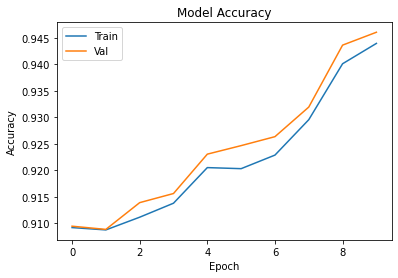

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['precision'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

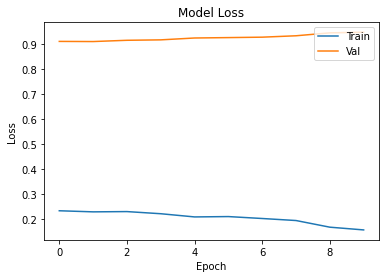

In [ ]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['precision'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()